In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1104,2023,SE,FT,Data Manager,100000,USD,100000,US,0,US,M
2012,2022,MI,FT,Data Analyst,45000,GBP,55410,GB,0,GB,M
2432,2022,SE,FT,Data Engineer,225000,USD,225000,US,0,US,M
1711,2023,MI,FT,Machine Learning Engineer,55250,GBP,67141,GB,0,GB,M
2896,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [12]:
cols = [col for col in df.columns if df[col].nunique()<10]
cols

['work_year',
 'experience_level',
 'employment_type',
 'remote_ratio',
 'company_size']

<Axes: xlabel='company_size', ylabel='Count'>

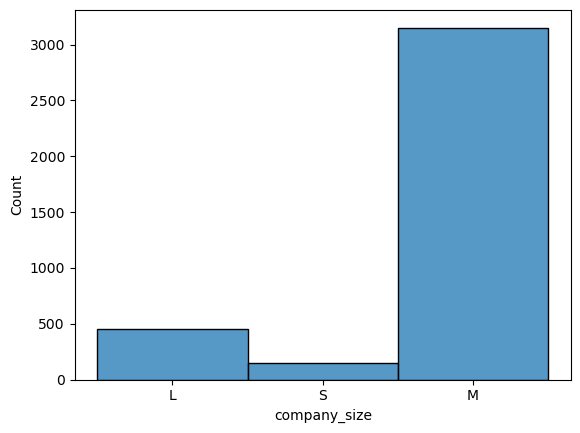

In [13]:
sns.histplot(df['company_size'])

<Axes: ylabel='company_size'>

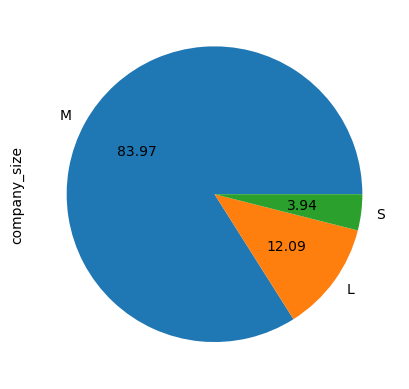

In [16]:
df['company_size'].value_counts().plot(kind='pie', autopct='%.2f')

In [21]:
num = [col for col in df.columns if df[col].dtype in ['float64','int64']]
num

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

(array([3.722e+03, 1.700e+01, 5.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([6.00000e+03, 1.52570e+06, 3.04540e+06, 4.56510e+06, 6.08480e+06,
        7.60450e+06, 9.12420e+06, 1.06439e+07, 1.21636e+07, 1.36833e+07,
        1.52030e+07, 1.67227e+07, 1.82424e+07, 1.97621e+07, 2.12818e+07,
        2.28015e+07, 2.43212e+07, 2.58409e+07, 2.73606e+07, 2.88803e+07,
        3.04000e+07]),
 <BarContainer object of 20 artists>)

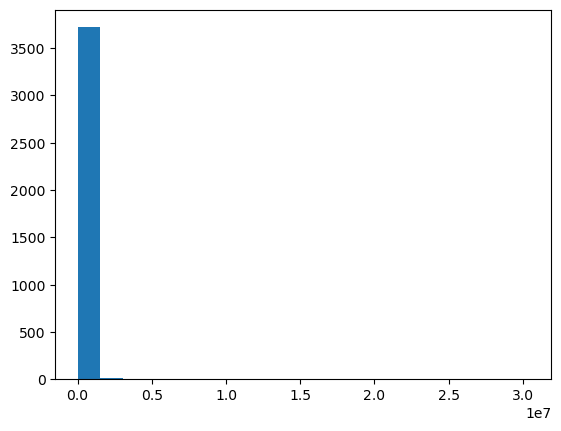

In [18]:
plt.hist(df['salary'],bins=20)

<Axes: >

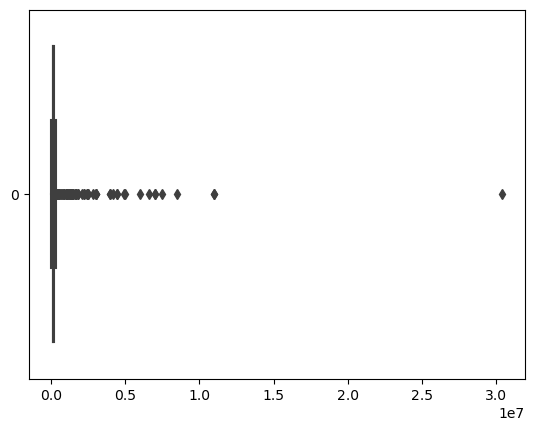

In [20]:
sns.boxplot(df['salary'], orient="h")

(array([1923.,    0.,    0.,    0.,    0.,  189.,    0.,    0.,    0.,
        1643.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

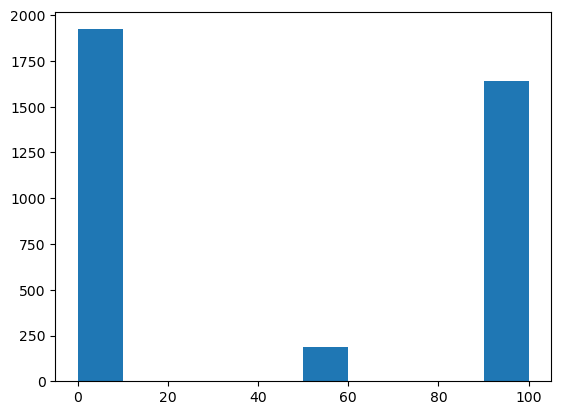

In [25]:
plt.hist(df['remote_ratio'],bins=10)

<Axes: >

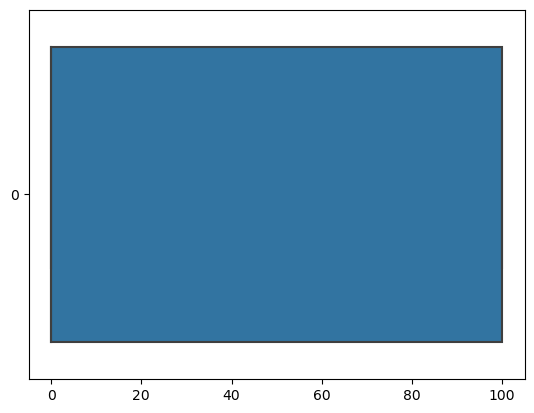

In [26]:
sns.boxplot(df['remote_ratio'], orient="h")